# Exploratory Data Analysis
### Steps:
- Importing Data
- Understanding the data
- Cleaning the Data
  - Extra Columns
  - Missing Values
  - Handling Outliers
- Univariate Analysis
- Multivariate Analysis
  - Numerical Variables
  - Categorical Variables
- Conclusion

#### 1. Importing Data and Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
df=pd.read_csv('titanic.csv')
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 2. Understanding the Data

In [3]:
#heads
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#tails
df.tail()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
#shape
df.shape

(891, 16)

In [6]:
#columns
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
#data types
df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [9]:
#describe
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3. Cleaning the Data
1. Extra Columns

Removing the unnamed column as it is not required.

In [10]:
# removing the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

Removing the alive column as it is not required because we have the survived column.

In [11]:
df.drop('alive',axis=1,inplace=True)

joining the parch and sibsp columns to get the family size.

In [12]:
#joining the sibsp and parch columns
df['family']=df['sibsp']+df['parch']

Shifting the fare column to the next of the age column.

In [13]:
fare=df['fare']
df.drop('fare',axis=1,inplace=True)
df.insert(4,'fare',fare)

In [14]:
#shifting the family column to the next to parch
family=df['family']
df.drop('family',axis=1,inplace=True)
df.insert(7,'family',family)

Checking the updated data.

In [15]:
df.head()

,survived,pclass,sex,age,fare,sibsp,parch,family,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,7.2500,1,0,1,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,71.2833,1,0,1,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,7.9250,0,0,0,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,53.1000,1,0,1,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,8.0500,0,0,0,S,Third,man,True,NaN,Southampton,True


2. Missing Values

In [16]:
#checking for null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
sibsp            0
parch            0
family           0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

Removing deck column as it has more than 50% of the data missing.

In [17]:
#droping the deck column
df.drop('deck',axis=1,inplace=True)

In [18]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
sibsp            0
parch            0
family           0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [19]:
#dropping the null values of embark_town and embarked
df.dropna(subset=['embark_town','embarked'],axis=0,inplace=True)

In [20]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
fare             0
sibsp            0
parch            0
family           0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alone            0
dtype: int64

Filling the missing values in the age column with the mean of the age column.

In [21]:
df['age'].fillna(df['age'].mean(), inplace=True)

Checking the updated data for missing values.

In [22]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
sibsp          0
parch          0
family         0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

#### 4. Univariate Analysis

<AxesSubplot:ylabel='count'>

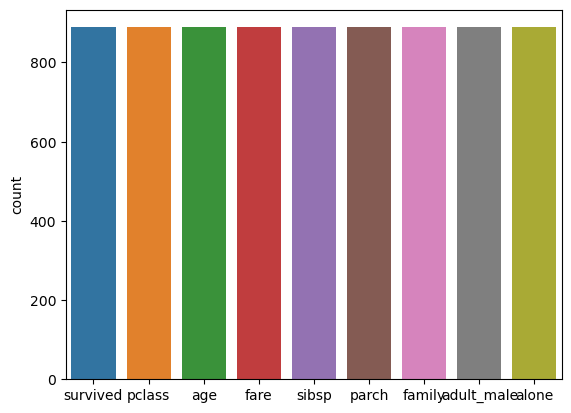

In [23]:
sns.countplot(data=df)

<AxesSubplot:ylabel='who'>

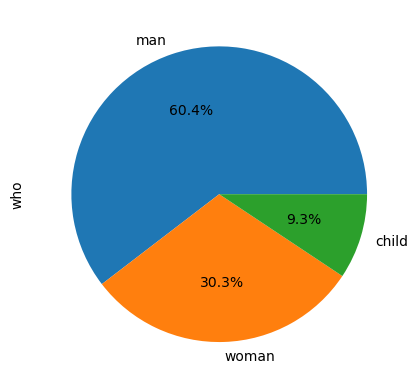

In [26]:
df['who'].value_counts().plot.pie(autopct='%1.1f%%')

Handling Outliers

<AxesSubplot:>

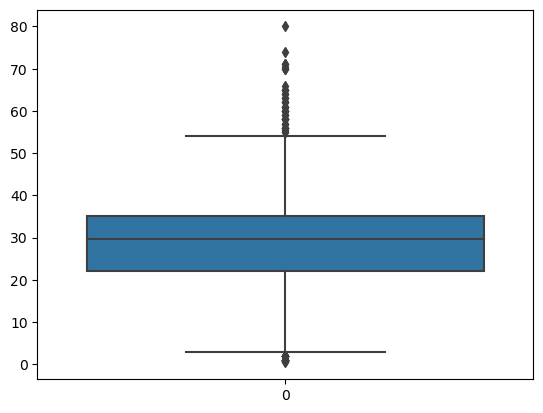

In [27]:
#age outliers
sns.boxplot(data=df['age'])

In [28]:
#REMOVE THE OUTLIERS IN AGE
df=df[df['age']<70]

<AxesSubplot:>

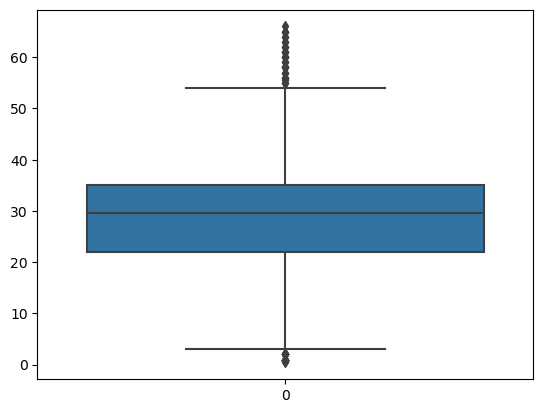

In [29]:
sns.boxplot(data=df['age'])

<AxesSubplot:>

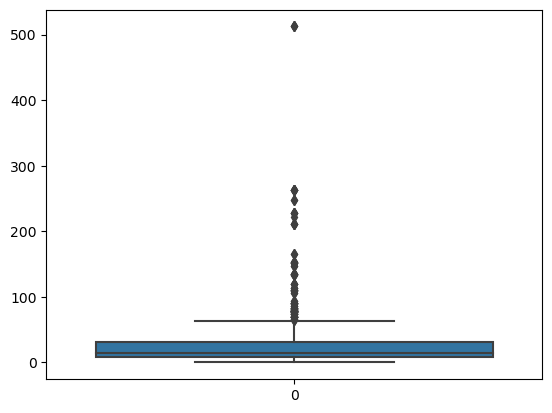

In [30]:
#checking for outliers in fare
sns.boxplot(data=df['fare'])

In [31]:
#using IQR method to remove the outliers in fare
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['fare']>=Q1-1.5*IQR)&(df['fare']<=Q3+1.5*IQR)]

<AxesSubplot:>

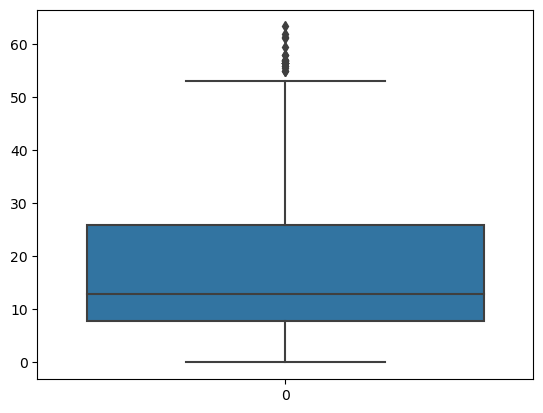

In [32]:
sns.boxplot(data=df['fare'])

#### 5. Multivariate Analysis
1. Numerical Variables

<AxesSubplot:xlabel='age', ylabel='fare'>

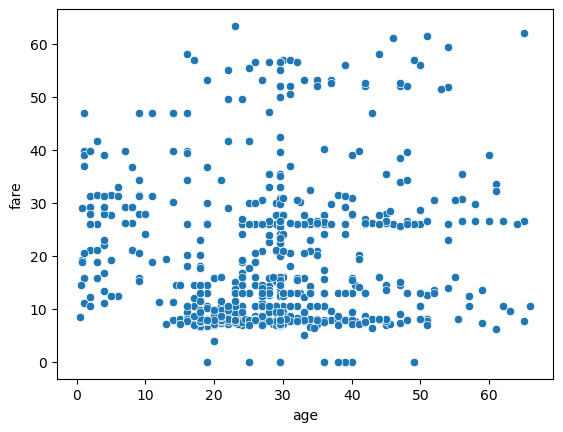

In [33]:
sns.scatterplot(data=df,x='age',y='fare')

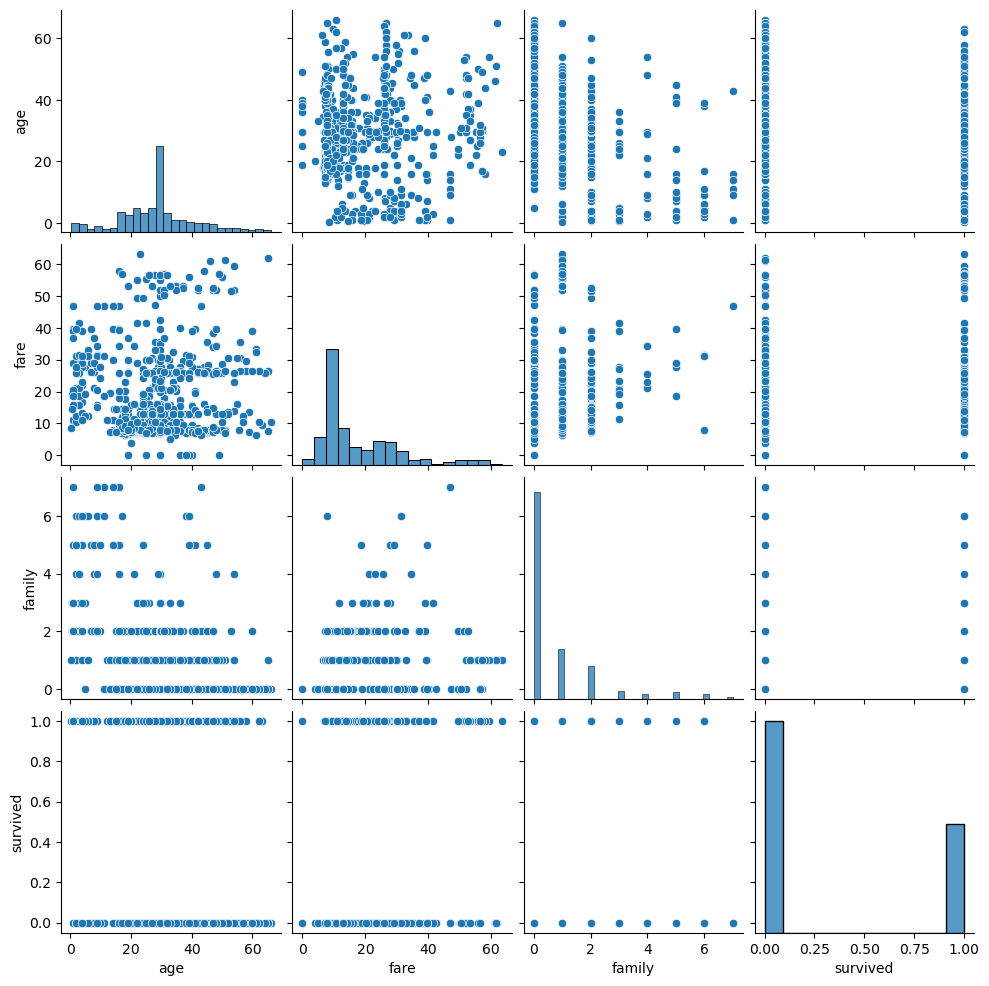

In [34]:
#pairplot
sns.pairplot(data=df,vars=['age','fare','family','survived'])

<AxesSubplot:>

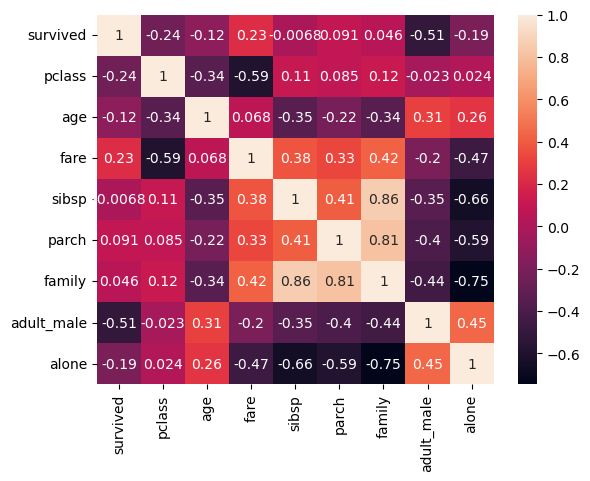

In [38]:
#heatmap
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:xlabel='pclass', ylabel='survived'>

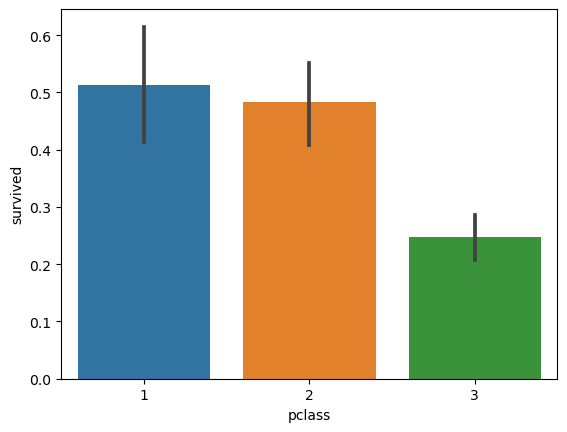

In [39]:
#catorical data
sns.barplot(data=df,x='pclass',y='survived')

<AxesSubplot:xlabel='age', ylabel='fare'>

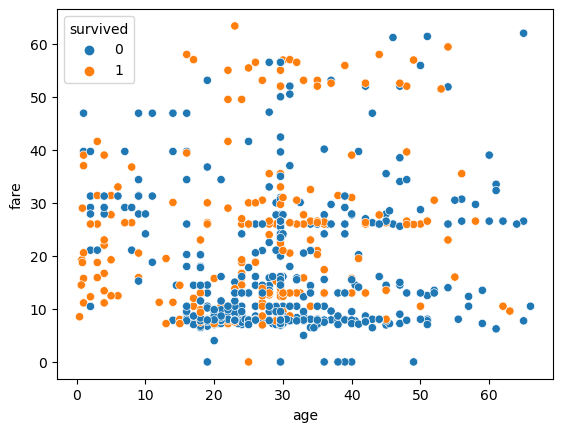

In [40]:
sns.scatterplot(data=df,x='age',y='fare',hue='survived')

<AxesSubplot:xlabel='survived', ylabel='age'>

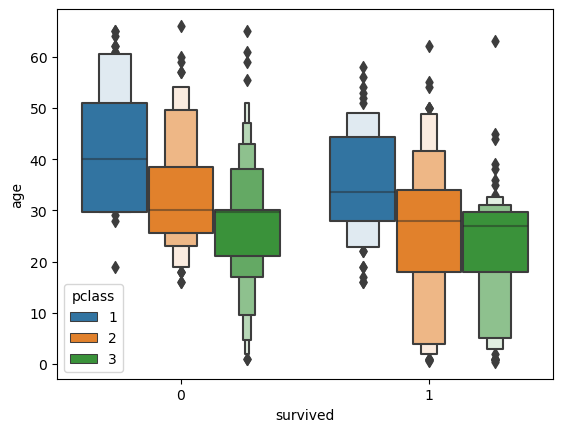

In [41]:
sns.boxenplot(data=df,x='survived',y='age',hue='pclass')

#### 6. Conclusion
We have successfully performed the Exploratory Data Analysis on the titanic dataset. We have also cleaned the data and handled the outliers. We have also performed the univariate and multivariate analysis on the data. We have also found out the correlation between the variables. We have also found out the most important features that are required for the prediction of the survival of the passengers. We have also found out the most important features that are required for the prediction of the survival of the passengers.